<a href="https://colab.research.google.com/github/Iambinhh/Homeworks_week_5/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a1c7a43927f0a35dc3b7d643a2907bd0f14792e66e48782c426dec272fb2fafe
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


13.333333333333334


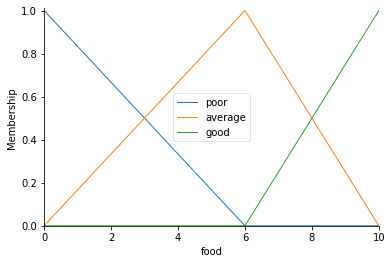

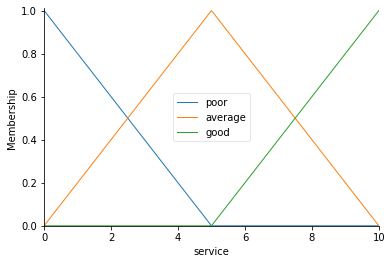

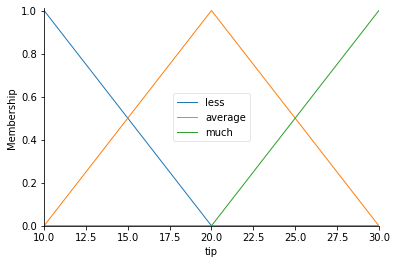

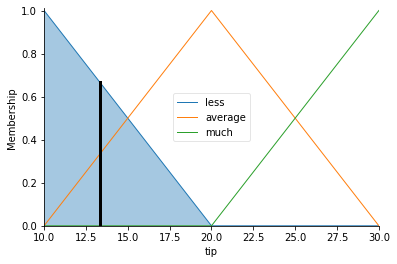

In [37]:
import numpy as np
import skfuzzy as fuzz #extract the fuzzy library
from skfuzzy import control as ctrl
food= ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,6])
food['average']=fuzz.trimf(food.universe,[0,6,10])
food['good']=fuzz.trimf(food.universe,[6,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['average']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule6=ctrl.Rule(food['average']&service['good'],tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['average'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=0
tipping.input['service']=0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


59.215106085926294


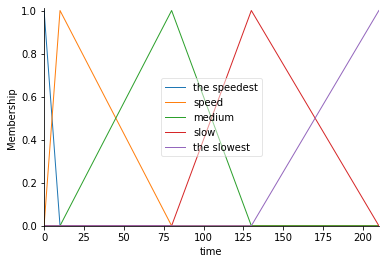

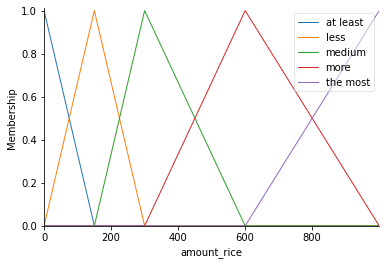

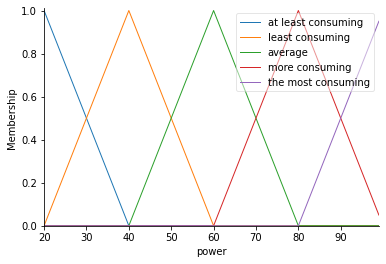

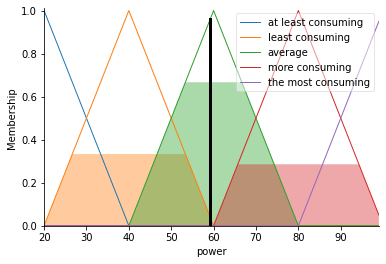

In [48]:
import numpy as np
import skfuzzy as fuzz #extract the fuzzy library
from skfuzzy import control as ctrl
time= ctrl.Antecedent(np.arange(0,211,1),'time')
amount_rice=ctrl.Antecedent(np.arange(0,1000,1),'amount_rice')
power=ctrl.Consequent(np.arange(20,100),'power')


time['the speedest']=fuzz.trimf(time.universe,[0,0,10])
time['speed']=fuzz.trimf(time.universe,[0,10,80])
time['medium']=fuzz.trimf(time.universe,[10,80,130])
time['slow']=fuzz.trimf(time.universe,[80,130,210])
time['the slowest']=fuzz.trimf(time.universe,[130,210,210])




amount_rice['at least']=fuzz.trimf(amount_rice.universe,[0,0,150])
amount_rice['less']=fuzz.trimf(amount_rice.universe,[0,150,300])
amount_rice['medium']=fuzz.trimf(amount_rice.universe,[150,300,600])
amount_rice['more']=fuzz.trimf(amount_rice.universe,[300,600,1000])
amount_rice['the most']=fuzz.trimf(amount_rice.universe,[600,1000,1000])

power['at least consuming']=fuzz.trimf(power.universe,[20,20,40])
power['least consuming']=fuzz.trimf(power.universe,[20,40,60])
power['average']=fuzz.trimf(power.universe,[40,60,80])
power['more consuming']=fuzz.trimf(power.universe,[60,80,100])
power['the most consuming']=fuzz.trimf(power.universe,[80,100,100])


time.view()
amount_rice.view()
power.view()

rule1=ctrl.Rule(time['the speedest']&amount_rice['at least'],power['the most consuming'])
rule2=ctrl.Rule(time['speed']&amount_rice['at least'],power['more consuming'])
rule3=ctrl.Rule(time['medium']&amount_rice['at least'],power['the most consuming'])
rule4=ctrl.Rule(time['slow']&amount_rice['at least'],power['more consuming'])
rule5=ctrl.Rule(time['the slowest']&amount_rice['at least'],power['average'])

rule6=ctrl.Rule(time['the speedest']&amount_rice['less'],power['more consuming'])
rule7=ctrl.Rule(time['speed']&amount_rice['less'],power['more consuming'])
rule8=ctrl.Rule(time['medium']&amount_rice['less'],power['average'])
rule9=ctrl.Rule(time['slow']&amount_rice['less'],power['least consuming'])
rule10=ctrl.Rule(time['the slowest']&amount_rice['less'],power['average'])

rule11=ctrl.Rule(time['the speedest']&amount_rice['medium'],power['the most consuming'])
rule12=ctrl.Rule(time['speed']&amount_rice['medium'],power['more consuming'])
rule13=ctrl.Rule(time['medium']&amount_rice['medium'],power['least consuming'])
rule14=ctrl.Rule(time['slow']&amount_rice['medium'],power['average'])
rule15=ctrl.Rule(time['the slowest']&amount_rice['medium'],power['least consuming'])

rule16=ctrl.Rule(time['the speedest']&amount_rice['more'],power['the most consuming'])
rule17=ctrl.Rule(time['speed']&amount_rice['more'],power['average'])
rule18=ctrl.Rule(time['medium']&amount_rice['more'],power['average'])
rule19=ctrl.Rule(time['slow']&amount_rice['more'],power['the most consuming'])
rule20=ctrl.Rule(time['the slowest']&amount_rice['more'],power['least consuming'])

rule21=ctrl.Rule(time['the speedest']&amount_rice['the most'],power['the most consuming'])                
rule22=ctrl.Rule(time['speed']&amount_rice['the most'],power['more consuming'])
rule23=ctrl.Rule(time['medium']&amount_rice['the most'],power['average'])
rule24=ctrl.Rule(time['slow']&amount_rice['the most'],power['least consuming'])
rule25=ctrl.Rule(time['the slowest']&amount_rice['the most'],power['at least consuming'])


powerping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerping=ctrl.ControlSystemSimulation(powerping_ctrl)
powerping.input['time']=60
powerping.input['amount_rice']=500
powerping.compute()
print(powerping.output['power'])
power.view(sim=powerping)
